# polynomial regression

    when linear regression is not able to capture the relationship between the independent and dependent features, we use polynomial regression.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score, make_scorer # make scorer is used to create our own scoring function because gridsearch dont have mean_squared_error scoring function.

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
# creating the data

x = 6 * np.random.rand(200, 1) - 3
y = 0.8 * x**5 + 0.9 * x**3 + 1.6 * x**2 + 2 + np.random.rand(200, 1)

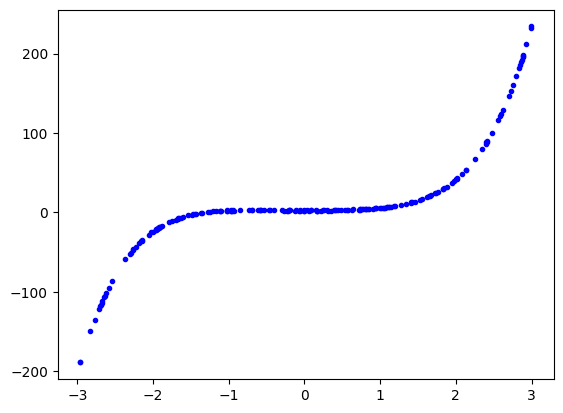

In [28]:
# visualising the data
plt.plot(x, y, 'b.')
plt.show()

In [29]:
# splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [30]:
# performing linear regression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
pred = lr.predict(xtest)

# cost of the linear regression model
mean_squared_error(ytest, pred), r2_score(ytest, pred)

(1351.7047020396237, 0.5039675467029859)

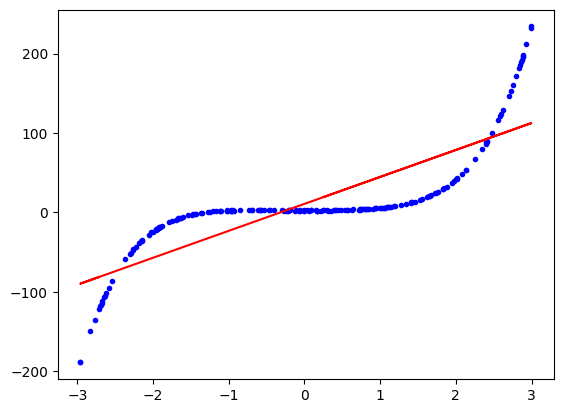

In [31]:
# visualising the predictions
plt.plot(x, y, 'b.')
plt.plot(xtrain, lr.predict(xtrain), 'r')
plt.show()

you can clearly see that linear regression is not able to capture the relationship between independent and dependent variables.

In [32]:
# creating the polynomial features
poly = PolynomialFeatures(degree=5, include_bias=True) 
# this function returns x^0, x^1 ... , x^n where n = degree and 'include_bias' attribute specifies if the output should include x^0 or not. if true, x^0 is included.

xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

In [33]:
xtrain[0], xtrain_poly[0] # you can see that PolynomialFeatures() has returned x^0, x^1, x^2 values.

(array([0.25560871]),
 array([1.        , 0.25560871, 0.06533581, 0.0167004 , 0.00426877,
        0.00109113]))

In [34]:
# now we will train linear regression using 'xtrain_poly' values.
lr = LinearRegression()
lr.fit(xtrain_poly, ytrain)
y_pred = lr.predict(xtest_poly)

mean_squared_error(ytest, y_pred), r2_score(ytest, y_pred)

(0.08497842173194986, 0.9999688156333663)

In [35]:
lr.coef_ 
# first value is coefficient of x^0
# 2nd value is coefficient of x^1(0.9 is value in our equation)
# 3rd value is coefficient of x^2(0.8 is value in our equation)

array([[ 0.00000000e+00,  1.02069725e-01,  1.60886492e+00,
         8.59391480e-01, -1.41323303e-03,  8.03775314e-01]])

In [36]:
lr.intercept_ # returns intercept value.(2 is the original value in our equation.)

array([2.44873452])

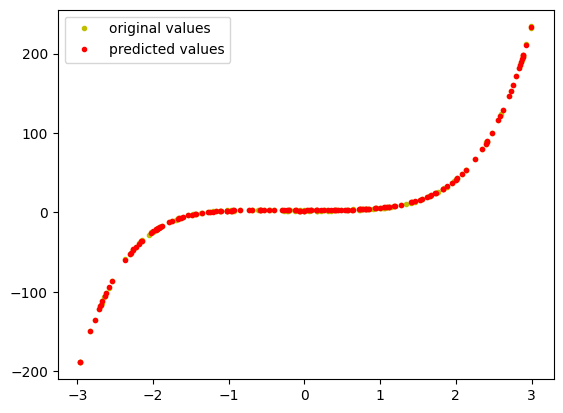

In [37]:
# visualize the polynomial regression model

plt.plot(x, y, 'y.', label = 'original values')
plt.plot(xtrain, lr.predict(xtrain_poly), 'r.', label = 'predicted values')
plt.legend()
plt.show()

### hyperparameter tuning 
            to select best value for 'degree' attribute.

In [38]:
trf1 = PolynomialFeatures()

trf2 = LinearRegression()

pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

In [39]:
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
mean_squared_error(ytest, ypred)

1211.007224654108

In [51]:
# hyperparameter tuning
params = {
    'trf1__degree' : [i for i in range(10)],
    'trf1__include_bias' : [True, False],
    'trf2__fit_intercept' : [False],
    'trf2__n_jobs' : [None, 10, 20, 30]
}

gcv = GridSearchCV(pipe, param_grid=params, cv = 5, scoring= make_scorer(mean_squared_error, greater_is_better=False))
# we use make_scorer() as gridsearch doesn't have mean_squared_error().

gcv.fit(xtrain, ytrain)
results = pd.DataFrame(gcv.cv_results_)
print("best parameters = ", gcv.best_params_)

best parameters =  {'trf1__degree': 5, 'trf1__include_bias': True, 'trf2__fit_intercept': False, 'trf2__n_jobs': None}


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RAJESH\A

In [41]:
gcv.best_score_

-0.08696066840537317

In [42]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_trf1__degree,param_trf1__include_bias,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003198,0.003916,0.004158,0.003590,0,True,"{'trf1__degree': 0, 'trf1__include_bias': True}",-3827.398642,-3638.285468,-5547.187992,-4948.571146,-6346.326183,-4861.553886,1024.507452,19
1,0.000399,0.000798,0.000000,0.000000,0,False,"{'trf1__degree': 0, 'trf1__include_bias': False}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,0.006396,0.003198,0.000000,0.000000,1,True,"{'trf1__degree': 1, 'trf1__include_bias': True}",-1281.016804,-1313.625197,-1807.684624,-1906.436211,-1312.305951,-1524.213757,273.805389,17
3,0.004428,0.004126,0.000000,0.000000,1,False,"{'trf1__degree': 1, 'trf1__include_bias': False}",-1281.016804,-1313.625197,-1807.684624,-1906.436211,-1312.305951,-1524.213757,273.805389,17
4,0.003199,0.003917,0.003197,0.003916,2,True,"{'trf1__degree': 2, 'trf1__include_bias': True}",-1539.982875,-1103.882236,-1508.647142,-1628.525555,-1388.388499,-1433.885261,182.045510,15


In [52]:
pipe.set_params(**gcv.best_params_) #setting the parameters value.

pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
mean_squared_error(ytest, ypred)

0.08497842173194507

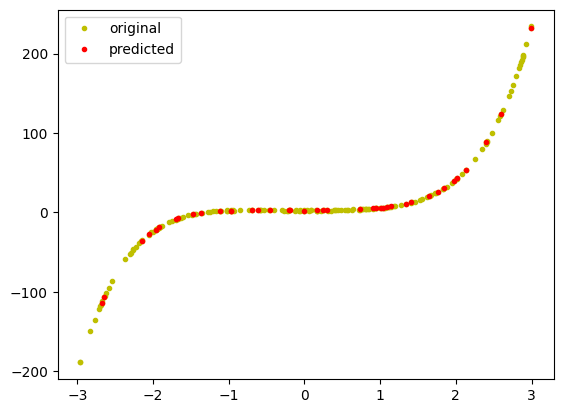

In [46]:
# visualising
plt.plot(x, y, 'y.', label = 'original')
plt.plot(xtest, ypred, 'r.', label = 'predicted')
plt.legend()
plt.show()

In [56]:
pipe.named_steps['trf2'].get_params() #getting parameters for specific model in a pipeline.

# NOTE : you can use model.set_params() to set the parameters and model.get_params() to get the parameters.

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}